## Joining and tidying

In this chapter, you'll learn to combine multiple related datasets, such as incorporating information about each resolution's topic into your vote analysis. You'll also learn how to turn untidy data into tidy data, and see how tidy data can guide your exploration of topics and countries over time.

### Joining datasets with inner_join
In the first chapter, you created the votes_processed dataset, containing information about each country's votes. You'll now combine that with the new descriptions dataset, which includes topic information about each country, so that you can analyze votes within particular topics.

In [1]:
# read data
votes = readRDS("votes.rds")
descriptions = readRDS("descriptions.rds")

# Load the dplyr package
library(dplyr)
library(countrycode)

# votes processed and by_year
votes_processed <- votes %>%
  filter(vote <= 3) %>%
  mutate(year = session + 1945) %>%
  mutate(country = countrycode(ccode, "cown", "country.name"))

# Join them together based on the "rcid" and "session" columns
votes_joined = votes_processed %>%
    inner_join(descriptions, by = c("rcid", "session"))

print(votes_joined)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"Problem with `mutate()` input `country`.
i Some values were not matched unambiguously: 260

i Input `country` is `countrycode(ccode, "cown", "country.name")`."Warning message in countrycode(ccode, "cown", "country.name"):
"Some values were not matched unambiguously: 260
"

# A tibble: 353,547 x 14
    rcid session  vote ccode  year country date                unres    me    nu
   <dbl>   <dbl> <dbl> <int> <dbl> <chr>   <dttm>              <chr> <dbl> <dbl>
 1    46       2     1     2  1947 United~ 1947-09-04 00:00:00 R/2/~     0     0
 2    46       2     1    20  1947 Canada  1947-09-04 00:00:00 R/2/~     0     0
 3    46       2     1    40  1947 Cuba    1947-09-04 00:00:00 R/2/~     0     0
 4    46       2     1    41  1947 Haiti   1947-09-04 00:00:00 R/2/~     0     0
 5    46       2     1    42  1947 Domini~ 1947-09-04 00:00:00 R/2/~     0     0
 6    46       2     1    70  1947 Mexico  1947-09-04 00:00:00 R/2/~     0     0
 7    46       2     1    90  1947 Guatem~ 1947-09-04 00:00:00 R/2/~     0     0
 8    46       2     1    91  1947 Hondur~ 1947-09-04 00:00:00 R/2/~     0     0
 9    46       2     1    92  1947 El Sal~ 1947-09-04 00:00:00 R/2/~     0     0
10    46       2     1    93  1947 Nicara~ 1947-09-04 00:00:00 R/2/~     0     0
# .

### Filtering the joined dataset
There are six columns in the descriptions dataset (and therefore in the new joined dataset) that describe the topic of a resolution:

1. me: Palestinian conflict
2. nu: Nuclear weapons and nuclear material
3. di: Arms control and disarmament
4. hr: Human rights
5. co: Colonialism
6. ec: Economic development

Each contains a 1 if the resolution is related to this topic and a 0 otherwise.

In [3]:
# Filter for votes related to colonialism
votes_joined %>%
    filter(co == 1)

rcid,session,vote,ccode,year,country,date,unres,me,nu,di,hr,co,ec
51,2,3,2,1947,United States,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,3,20,1947,Canada,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,2,40,1947,Cuba,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,1,41,1947,Haiti,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,3,42,1947,Dominican Republic,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,2,70,1947,Mexico,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,2,90,1947,Guatemala,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,2,92,1947,El Salvador,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,3,93,1947,Nicaragua,1947-10-02,R/2/561,0,0,0,0,1,0
51,2,2,95,1947,Panama,1947-10-02,R/2/561,0,0,0,0,1,0


### Visualizing colonialism votes
In an earlier exercise, you graphed the percentage of votes each year where the US voted "yes". Now you'll create that same graph, but only for votes related to colonialism.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"`summarise()` ungrouping output (override with `.groups` argument)


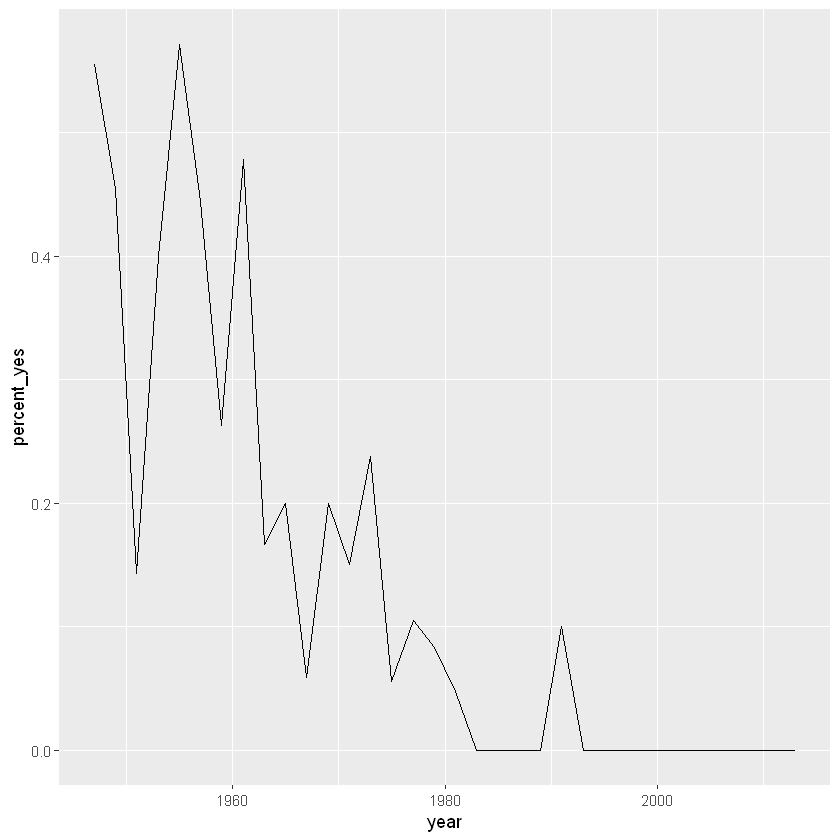

In [5]:
# Load the ggplot2 package
library(ggplot2)

# Filter, then summarize by year: US_co_by_year
US_co_by_year <- votes_joined %>%
  filter(country == "United States", co == 1) %>%
  group_by(year) %>%
  summarize(percent_yes = mean(vote == 1))

# Graph the % of "yes" votes over time
ggplot(US_co_by_year, aes(x = year, y = percent_yes)) + geom_line()

### Using gather to tidy a dataset
In order to represent the joined vote-topic data in a tidy form so we can analyze and graph by topic, we need to transform the data so that each row has one combination of country-vote-topic. This will change the data from having six columns (me, nu, di, hr, co, ec) to having two columns (topic and has_topic).

In [6]:
# Load the tidyr package
library(tidyr)

# Gather the six me/nu/di/hr/co/ec columns
votes_joined %>%  
    gather(topic, has_topic, me:ec)


# Perform gather again, then filter
votes_gathered <- votes_joined %>%  
    gather(topic, has_topic, me:ec) %>%
    filter(has_topic == 1)


Warning message:
"package 'tidyr' was built under R version 3.6.3"

rcid,session,vote,ccode,year,country,date,unres,topic,has_topic
46,2,1,2,1947,United States,1947-09-04,R/2/299,me,0
46,2,1,20,1947,Canada,1947-09-04,R/2/299,me,0
46,2,1,40,1947,Cuba,1947-09-04,R/2/299,me,0
46,2,1,41,1947,Haiti,1947-09-04,R/2/299,me,0
46,2,1,42,1947,Dominican Republic,1947-09-04,R/2/299,me,0
46,2,1,70,1947,Mexico,1947-09-04,R/2/299,me,0
46,2,1,90,1947,Guatemala,1947-09-04,R/2/299,me,0
46,2,1,91,1947,Honduras,1947-09-04,R/2/299,me,0
46,2,1,92,1947,El Salvador,1947-09-04,R/2/299,me,0
46,2,1,93,1947,Nicaragua,1947-09-04,R/2/299,me,0


### Recoding the topics
There's one more step of data cleaning to make this more interpretable. Right now, topics are represented by two-letter codes:

1. me: Palestinian conflict
2. nu: Nuclear weapons and nuclear material
3. di: Arms control and disarmament
4. hr: Human rights
5. co: Colonialism
6. ec: Economic development

So that you can interpret the data more easily, recode the data to replace these codes with their full name. You can do that with dplyr's recode() function, which replaces values with ones you specify:

example <- c("apple", "banana", "apple", "orange")

recode(example, apple = "plum", banana = "grape")

In [7]:
# Replace the two-letter codes in topic: votes_tidied
votes_tidied <- votes_gathered %>%
  mutate(topic = recode(topic,
                        me = "Palestinian conflict",
                        nu = "Nuclear weapons and nuclear material",
                        di = "Arms control and disarmament",
                        hr = "Human rights",
                        co = "Colonialism",
                        ec = "Economic development"))

### Summarize by country, year, and topic
In previous exercises, you summarized the votes dataset by country, by year, and by country-year combination.

Now that you have topic as an additional variable, you can summarize the votes for each combination of country, year, and topic (e.g. for the United States in 2013 on the topic of nuclear weapons.)



In [8]:
# Summarize the percentage "yes" per country-year-topic
by_country_year_topic <- votes_tidied %>% 
    group_by(country, year, topic) %>% 
    summarize(total = n(), percent_yes = mean(vote == 1)) %>%
    ungroup()


# Print by_country_year_topic
print(by_country_year_topic)

`summarise()` regrouping output by 'country', 'year' (override with `.groups` argument)


# A tibble: 26,968 x 5
   country      year topic                                total percent_yes
   <chr>       <dbl> <chr>                                <int>       <dbl>
 1 Afghanistan  1947 Colonialism                              8       0.5  
 2 Afghanistan  1947 Economic development                     1       0    
 3 Afghanistan  1947 Human rights                             1       0    
 4 Afghanistan  1947 Palestinian conflict                     6       0    
 5 Afghanistan  1949 Arms control and disarmament             3       0    
 6 Afghanistan  1949 Colonialism                             22       0.864
 7 Afghanistan  1949 Economic development                     1       1    
 8 Afghanistan  1949 Human rights                             3       0    
 9 Afghanistan  1949 Nuclear weapons and nuclear material     3       0    
10 Afghanistan  1949 Palestinian conflict                    11       0.818
# ... with 26,958 more rows


### Visualizing trends in topics for one country
You can now visualize the trends in percentage "yes" over time for all six topics side-by-side. Here, you'll visualize them just for the United States.

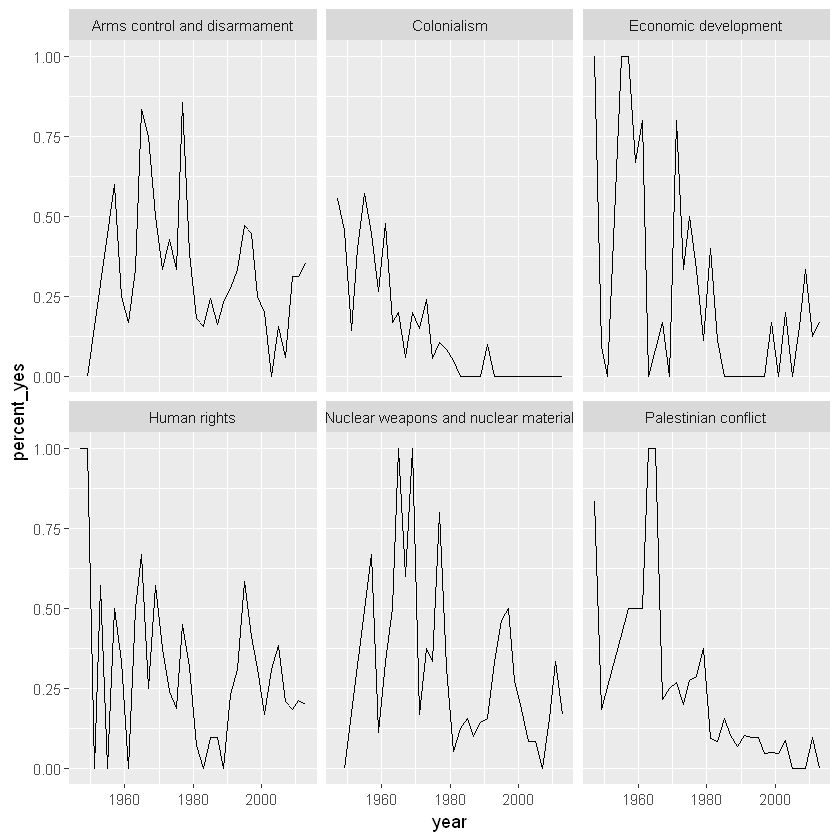

In [9]:
# Filter by_country_year_topic for just the US
US_by_country_year_topic <- by_country_year_topic %>%
    filter(country == "United States")

# Plot % yes over time for the US, faceting by topic
ggplot(US_by_country_year_topic, aes(x = year, y = percent_yes))+geom_line() + facet_wrap(~topic)



### Nesting by topic and country
In the last chapter, you constructed a linear model for each country by nesting the data in each country, fitting a model to each dataset, then tidying each model with broom and unnesting the coefficients. The code looked something like this:

country_coefficients <- by_year_country %>%

nest(-country) %>%
  
mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)), tidied = map(model, tidy)) %>%

unnest(tidied)

Now, you'll again be modeling change in "percentage" yes over time, but instead of fitting one model for each country, you'll fit one for each combination of country and topic.

In [10]:
# Load purrr, tidyr, and broom
library(purrr)

library(broom)
# Print by_country_year_topic
print(by_country_year_topic)

# Fit model on the by_country_year_topic dataset
country_topic_coefficients <- by_country_year_topic %>%
nest(-country, -topic) %>%
mutate(model = map(data, ~lm(percent_yes ~ year, data = .)), tidied = map(model, tidy)) %>%
unnest(tidied)


# Print country_topic_coefficients
print(country_topic_coefficients)

Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'broom' was built under R version 3.6.3"

# A tibble: 26,968 x 5
   country      year topic                                total percent_yes
   <chr>       <dbl> <chr>                                <int>       <dbl>
 1 Afghanistan  1947 Colonialism                              8       0.5  
 2 Afghanistan  1947 Economic development                     1       0    
 3 Afghanistan  1947 Human rights                             1       0    
 4 Afghanistan  1947 Palestinian conflict                     6       0    
 5 Afghanistan  1949 Arms control and disarmament             3       0    
 6 Afghanistan  1949 Colonialism                             22       0.864
 7 Afghanistan  1949 Economic development                     1       1    
 8 Afghanistan  1949 Human rights                             3       0    
 9 Afghanistan  1949 Nuclear weapons and nuclear material     3       0    
10 Afghanistan  1949 Palestinian conflict                    11       0.818
# ... with 26,958 more rows


Warning message:
"All elements of `...` must be named.
Did you want `data = c(year, total, percent_yes)`?"Warning message:
"Problem with `mutate()` input `tidied`.
i essentially perfect fit: summary may be unreliable
i Input `tidied` is `map(model, tidy)`."Warning message in summary.lm(x):
"essentially perfect fit: summary may be unreliable"Warning message:
"Problem with `mutate()` input `tidied`.
i essentially perfect fit: summary may be unreliable
i Input `tidied` is `map(model, tidy)`."Warning message in summary.lm(x):
"essentially perfect fit: summary may be unreliable"Warning message:
"Problem with `mutate()` input `tidied`.
i essentially perfect fit: summary may be unreliable
i Input `tidied` is `map(model, tidy)`."Warning message in summary.lm(x):
"essentially perfect fit: summary may be unreliable"Warning message:
"Problem with `mutate()` input `tidied`.
i essentially perfect fit: summary may be unreliable
i Input `tidied` is `map(model, tidy)`."Warning message in summary.lm(x)

# A tibble: 2,384 x 9
   country  topic      data    model term   estimate std.error statistic p.value
   <chr>    <chr>      <list>  <lis> <chr>     <dbl>     <dbl>     <dbl>   <dbl>
 1 Afghani~ Coloniali~ <tibbl~ <lm>  (Inte~ -9.20e+0  1.96         -4.70 4.76e-5
 2 Afghani~ Coloniali~ <tibbl~ <lm>  year    5.11e-3  0.000989      5.17 1.23e-5
 3 Afghani~ Economic ~ <tibbl~ <lm>  (Inte~ -1.15e+1  3.62         -3.17 3.49e-3
 4 Afghani~ Economic ~ <tibbl~ <lm>  year    6.24e-3  0.00183       3.42 1.85e-3
 5 Afghani~ Human rig~ <tibbl~ <lm>  (Inte~ -7.27e+0  4.37         -1.66 1.06e-1
 6 Afghani~ Human rig~ <tibbl~ <lm>  year    4.08e-3  0.00221       1.85 7.43e-2
 7 Afghani~ Palestini~ <tibbl~ <lm>  (Inte~ -1.33e+1  3.57         -3.73 8.66e-4
 8 Afghani~ Palestini~ <tibbl~ <lm>  year    7.17e-3  0.00180       3.98 4.42e-4
 9 Afghani~ Arms cont~ <tibbl~ <lm>  (Inte~ -1.38e+1  4.13         -3.33 2.53e-3
10 Afghani~ Arms cont~ <tibbl~ <lm>  year    7.37e-3  0.00208       3.54 1.49e-3
# ... 

### Interpreting tidy models
Now you have both the slope and intercept terms for each model. Just as you did in the last chapter with the tidied coefficients, you'll need to filter for only the slope terms.

You'll also have to extract only cases that are statistically significant, which means adjusting the p-value for the number of models, and then filtering to include only significant changes.

In [13]:
# Create country_topic_filtered
country_topic_filtered <- country_topic_coefficients %>%
filter(term == "year") %>%
mutate(p.adjusted = p.adjust(p.value))%>%
filter(p.adjusted < 0.05) %>%
arrange(estimate)

country_topic_filtered

country,topic,data,model,term,estimate,std.error,statistic,p.value,p.adjusted
Vanuatu,Palestinian conflict,"1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1995.0000000, 1997.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 5.0000000, 27.0000000, 26.0000000, 23.0000000, 29.0000000, 24.0000000, 14.0000000, 20.0000000, 6.0000000, 2.0000000, 12.0000000, 17.0000000, 9.0000000, 17.0000000, 10.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000, 0.9285714, 0.9500000, 0.1666667, 0.5000000, 0.2500000, 0.1764706, 0.0000000, 0.5294118, 0.1000000","65.93453, -0.03269409, -0.1675394, -0.1021512, -0.03676299, 0.02862519, 0.09401337, 0.1594016, 0.2187493, 0.3055661, -0.3469909, 0.05173063, -0.1328812, -0.1410224, -0.2521048, 0.3426951, -0.02132847, -2.478999, -1.31255, 0.009349029, 0.07207795, 0.1348069, 0.1975358, 0.2515651, 0.3357225, -0.322153, 0.0739093, -0.1133618, -0.1241623, -0.2379039, 0.3542367, -0.01244611, 2, 1.167539, 1.102151, 1.036763, 0.9713748, 0.9059866, 0.8405984, 0.7098221, 0.6444339, 0.5136575, 0.4482694, 0.3828812, 0.317493, 0.2521048, 0.1867166, 0.1213285, 0, 1, -3.872983, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, 0.2581989, -7734.864, 40.1464, 0.2197597, 0.1699421, 0.1201244, 0.07030673, -0.02932861, -0.07914628, -0.1787816, -0.2285993, -0.278417, -0.3282346, -0.3780523, -0.42787, -0.4776876, 1.258199, 1.269577, 1, 2, 1e-07, 2, 13, lm(formula = percent_yes ~ year, data = .), percent_yes ~ year, 1, 1, 1, 1, 1, 1, 0.9285714, 0.95, 0.1666667, 0.5, 0.25, 0.1764706, 0, 0.5294118, 0.1, 1981, 1983, 1985, 1987, 1989, 1991, 1995, 1997, 2001, 2003, 2005, 2007, 2009, 2011, 2013",year,-0.032694090,0.0051615993,-6.334101,2.600183e-05,2.948607e-02
Vanuatu,Colonialism,"1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1995.0000000, 1997.0000000, 2001.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 9.0000000, 15.0000000, 8.0000000, 8.0000000, 12.0000000, 10.0000000, 10.0000000, 8.0000000, 1.0000000, 8.0000000, 12.0000000, 10.0000000, 10.0000000, 12.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000, 1.0000000, 0.9000000, 0.8750000, 1.0000000, 0.7500000, 0.6666667, 0.5000000, 0.4000000, 0.5000000","36.60908, -0.01791999, -0.1095761, -0.07373609, -0.03789611, -0.00205612, 0.03378387, 0.06962385, 0.04130382, 0.05214381, 0.2488238, 0.07050375, 0.0230104, -0.1078163, -0.1719763, -0.03613631, -3.098003, -0.7111454, -0.006295739, 0.0275226, 0.06134093, 0.09515926, 0.06279593, 0.07161427, 0.2642509, 0.08188761, 0.03237261, -0.1004757, -0.1666574, -0.03283906, 2, 1.109576, 1.073736, 1.037896, 1.002056, 0.9662161, 0.9303761, 0.8586962, 0.8228562, 0.7511762, 0.6794963, 0.6436563, 0.6078163, 0.5719763, 0.5361363, 0, 1, -3.741657, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, 0.2672612, -7471.021, 39.68447, 0.2116746, 0.1612771, 0.1108795, 0.06048196, -0.04031314, -0.09071069, -0.1915058, -0.2923009, -0.3426984, -0.393096, -0.4434935, -0.4938911, 1.267261, 1.262072, 1, 2, 1e-07, 2, 12, lm(formula = percent_yes ~ year, data = .), percent_yes ~ year, 1, 1, 1, 1, 1, 1, 0.9, 0.875, 1, 0.75, 0.6666667, 0.5, 0.4, 0.5, 1981, 1983, 1985, 1987, 1989, 1991, 1995, 1997, 2001, 2005, 2007, 2009, 2011, 2013",year,-0.017919993,0.0027141630,-6.602401,2.528927e-05,2.870332e-02
Malta,Nuclear weapons and nuclear material,"1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 3.0000000, 4.0000000, 2.000

### Checking models visually
In the last exercise, you found that over its history, Vanuatu (an island nation in the Pacific Ocean) sharply changed its pattern of voting on the topic of Palestinian conflict.

Let's examine this country's voting patterns more closely. Recall that the by_country_year_topic dataset contained one row for each combination of country, year, and topic. You can use that to create a plot of Vanuatu's voting, faceted by topic.

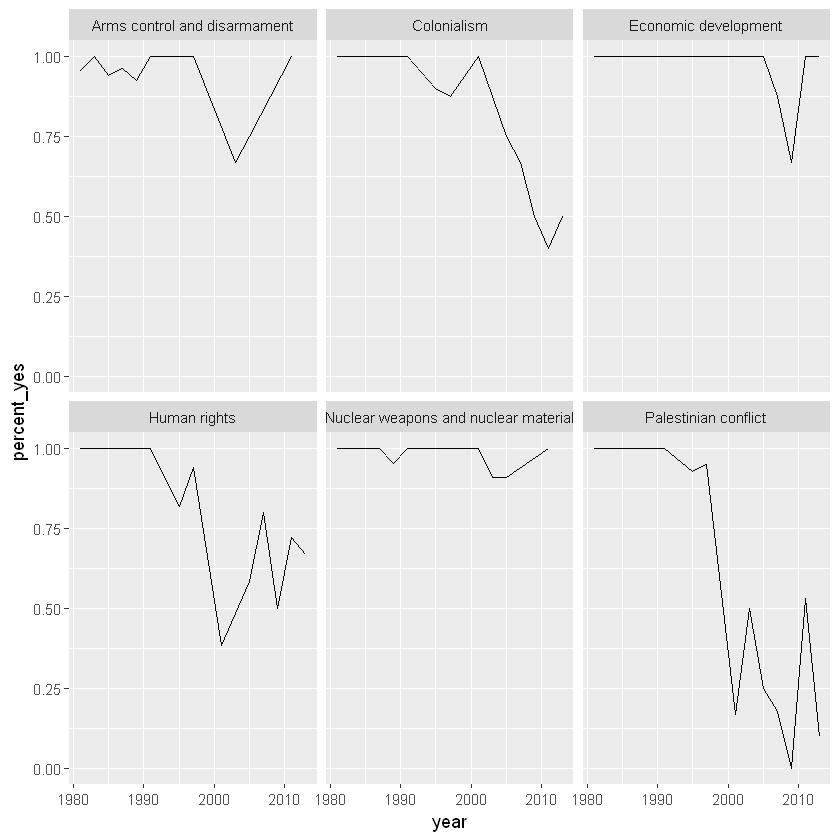

In [14]:
# Create vanuatu_by_country_year_topic
vanuatu_by_country_year_topic <- by_country_year_topic %>%
filter (country == "Vanuatu") 

# Plot of percentage "yes" over time, faceted by topic
ggplot(vanuatu_by_country_year_topic,aes(x = year, y = percent_yes))+geom_line() + facet_wrap(~topic)